In [0]:
!pip install numpy==1.16.1
!pip install -q tensorflow==2.0.0-alpha0


     |████████████████████████████████| 17.3MB 4.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


     |████████████████████████████████| 79.9MB 432kB/s 
     |████████████████████████████████| 419kB 46.5MB/s 
     |████████████████████████████████| 61kB 26.3MB/s 
     |████████████████████████████████| 3.0MB 43.6MB/s 


Working with non deep machine learning techniques 

In [0]:
#import tensorflow from another place here beta 2.0
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np


In [0]:
%matplotlib inline

In [3]:
#sanity check, keras doesn't play well for dataset imports on np > 1.16.1 
np.__version__

'1.16.1'

In [0]:
a = np.array([0, 15, 30, 41])
sd= np.std(a)

In [0]:
a/sd

array([0.        , 0.96976228, 1.93952455, 2.65068355])

In [0]:
(a - np.min(a))/ (np.max(a) - np.min(a))

array([0.        , 0.36585366, 0.73170732, 1.        ])

In [0]:
2.65/1.93

1.3730569948186528

In [0]:
#keras specific imports
models = tf.keras.models
layers = tf.keras.layers 
regularizers = tf.keras.regularizers

In [0]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [0]:
def vectorize_sequences(sequences, dimensions =10000):
  results = np.zeros((len(sequences), dimensions)) #creates an all zero matric of shape 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model= models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(x_train[:20000], y_train[:20000], epochs=20, batch_size=28, validation_data=(x_train[20000:], y_train[20000:]))

In [0]:
#no regularizer
model2= models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_noregularizer= model2.fit(x_train[:20000], y_train[:20000], epochs=20, batch_size=28, validation_data=(x_train[20000:], y_train[20000:]))

In [0]:
#adding both l1 and l2 regularizers 
model3= models.Sequential()
model3.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
both_regularizers = model3.fit(x_train[:20000], y_train[:20000], epochs=20, batch_size=28, validation_data=(x_train[20000:], y_train[20000:]))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 201us/sample - loss: 0.6678 - accuracy: 0.8317 - val_loss: 0.5815 - val_accuracy: 0.8682
Epoch 2/20
20000/20000 [==============================] - 4s 176us/sample - loss: 0.5727 - accuracy: 0.8621 - val_loss: 0.5529 - val_accuracy: 0.8666
Epoch 3/20
20000/20000 [==============================] - 4s 176us/sample - loss: 0.5468 - accuracy: 0.8665 - val_loss: 0.5384 - val_accuracy: 0.8688
Epoch 4/20
20000/20000 [==============================] - 4s 177us/sample - loss: 0.5270 - accuracy: 0.8708 - val_loss: 0.5197 - val_accuracy: 0.8654
Epoch 5/20
20000/20000 [==============================] - 4s 178us/sample - loss: 0.5060 - accuracy: 0.8737 - val_loss: 0.5167 - val_accuracy: 0.8684
Epoch 6/20
20000/20000 [==============================] - 4s 176us/sample - loss: 0.4846 - accuracy: 0.8812 - val_loss: 0.4778 - val_accuracy: 0.8774
Epoch 7/20
20000/20000 [===========================

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

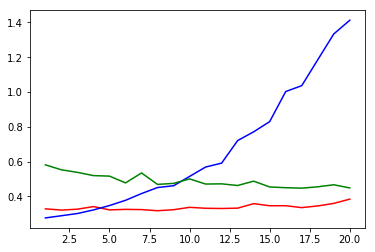

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(range(1, 21), history.history['val_loss'], 'r-')
#plt.plot(range(1, 21), history.history['accuracy'], 'ro')
plt.plot(range(1, 21), history_noregularizer.history['val_loss'], 'b-')
#plt.plot(range(1, 21), history_noregularizer.history['accuracy'], 'bo')
plt.plot(range(1, 21), both_regularizers.history['val_loss'], 'g-')

In [0]:
a = np.random.randint(0, high=2, size=50)

In [0]:
one_mask = a[a==1]
len(one_mask)

20

In [0]:
zero_mask = a[a==0]
len(zero_mask)

30

In [0]:
#apply dropout
model4= models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16,  activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
drop_out_regularizer = model4.fit(x_train[:20000], y_train[:20000], epochs=20, batch_size=28, validation_data=(x_train[20000:], y_train[20000:]))


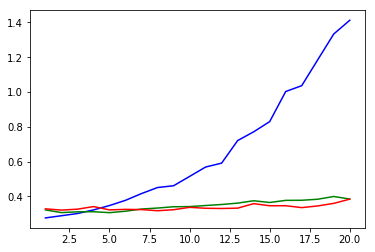

In [0]:
#plt.plot(range(1, 21), history.history['accuracy'], 'ro')
plt.plot(range(1, 21), history_noregularizer.history['val_loss'], 'b-')
#plt.plot(range(1, 21), history_noregularizer.history['accuracy'], 'bo')
plt.plot(range(1, 21), drop_out_regularizer.history['val_loss'], 'g-')
plt.plot(range(1, 21), history.history['val_loss'], 'r-')

In [0]:
a = np.random.rand(1,3,3,3)
b = np.random.rand(3,3,3,1)

In [0]:
b = np.copy(a)

In [16]:
np.dot(a,b).shape

(1, 3, 3, 3, 3, 1)

In [13]:
a.shape

(3, 3, 3)